# IRIS ML eksempel
I dette eksemplet ønsker man å lage en algoritme som skiller tre forskjellige sorter av blomsten Iris ved at man måler lengde og bredden på begerblad og kronblad. 
Mer info om datasettet ligger her:https://archive.ics.uci.edu/ml/datasets/Iris
Avhengige variabel: sort
Uavhengige variabler: Kronblad og begerblad bredde og lengde

For å innstallere pakker inn i Jupyter så må man  spesifisere Cran repository direkte (pop up seleksjon virker ikke) 
install.packages("packages name", repos = c("http://cran.uib.no"))


## Laste inn data og gi meningsfulle navn

In [10]:
#Last inn riktige bilioteker
library(ggplot2)
library (class)

#Last inn dataene og legg på kolonnenavn
iris <- read.csv(url("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"), header = FALSE)
names(iris) <- c("Begerblad.Lengde", "Begerblad.Bredde", "Kronblad.lengde", "Kronblad.bredde", "Sort")


Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'class' was built under R version 3.4.3"

## Visualisere dataene
For å se på dataene så er det hensiktsmessig å gjøre noen plot, gir bedre innsikt og en følelse for hvor stor variasjon det er mellom de variablene vi ønsker å separere.
Ser at Iris-setose har klustrer ganske forskjellig fra de to andre sortene både på begerblad og kronblad. Bør derfor være lettere å skille ut denne sorten. Iris-versicolor og Iris-virginica klustrer seg mye mer sammen, særlig på begerblad. Disse to artene vil derfor sannsynligvis være vanskeligere å skille ved hjelp av de variablene vi har valgt (lengde og bredde på kronblad og begerblad)

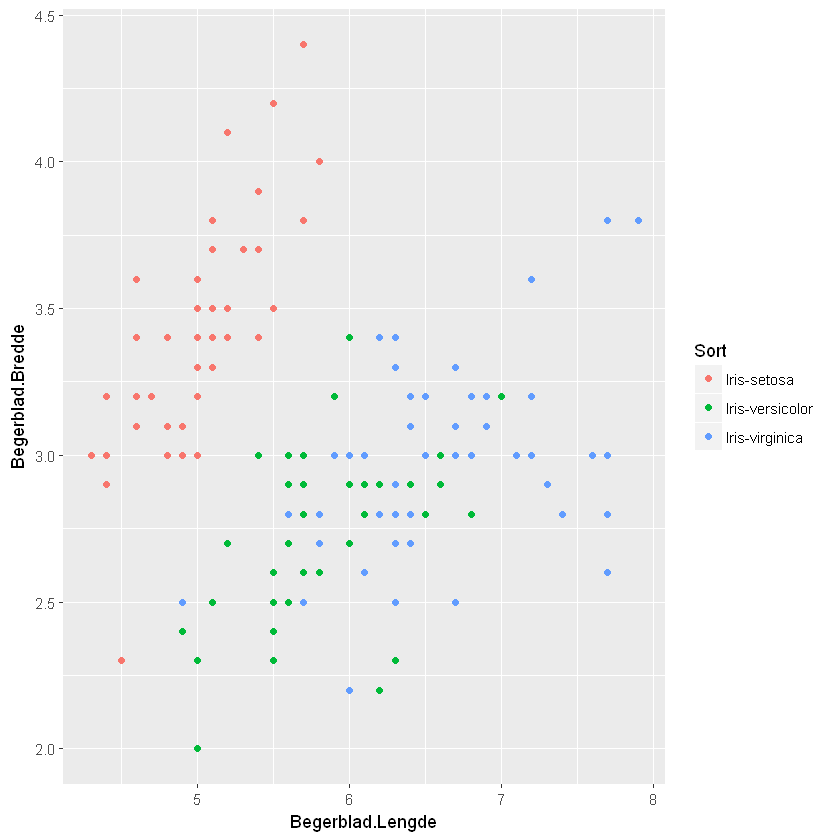

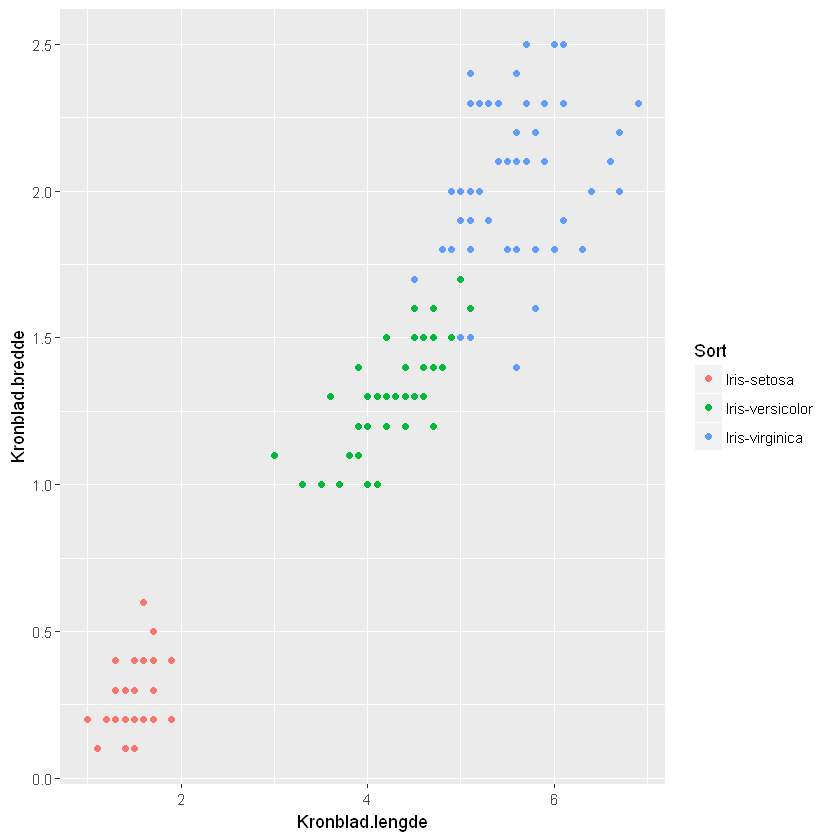

In [13]:
#Plotte Begerblad lengde mot bredde og farge punktene  etter sort
ggplot(iris, aes(x=Begerblad.Lengde, y=Begerblad.Bredde, color=Sort)) + geom_point()
ggplot(iris, aes(x=Kronblad.lengde, y=Kronblad.bredde, color=Sort)) + geom_point()

## Gjøre beregninger som støtter det visuelle bildet
For å bekrefte sammenhengen mellom variablene som plottene viser så kan man gjøre korrelasjoner.Ser at overordnet så er korrelasjonen mellom kronblad lengde og bredde uavhenig av sort 0,96 (vises også i plottet over). Men hvis man ser på korrelasjonsmatrisen for en sort (se under for Iris-virginica) så er det mye lavere korrelasjon.

In [15]:
#Korrelasjon mellom Kronblad lengde og Kronblad bredde. Korrelasjonen totalt mellom kronblad lengde og bredde uavhengig av sort.
cor(iris$Kronblad.lengde, iris$Kronblad.bredde)

#Lager en variabel X som inneholder de tre sortnavnene. Sort [3] er Iris-virginica
x=levels(iris$Sort)
print(x[3])

#print korrelasjonsmatrise for Iris Virginica
cor(iris[iris$Sort==x[3], 1:4])

[1] 0.9627571

[1] "Iris-virginica"


,Begerblad.Lengde,Begerblad.Bredde,Kronblad.lengde,Kronblad.bredde
Begerblad.Lengde,1.0000000,0.4572278,0.8642247,0.2811077
Begerblad.Bredde,0.4572278,1.0000000,0.4010446,0.5377280
Kronblad.lengde,0.8642247,0.4010446,1.0000000,0.3221082
Kronblad.bredde,0.2811077,0.5377280,0.3221082,1.0000000


## Normalisere dataene
For å sammenligne data er det veldig vanlig at man må normalisere dem. Dette kan gjøres veldig enkelt eller mer komplisert ettersom hvilke data man jobber med. Her gjør vi en normalisering ved å standardisere slik at alle dataene kommer mellom 0 og 1 med en metode som også kalles "Feature Scaling" https://en.wikipedia.org/wiki/Feature_scaling

Formel: x - min(x)/(max(x)-min(x))

In [17]:
# Bygge en normalisering()` funksjon
normalize <- function(x) {
  num <- x - min(x)
  denom <- max(x) - min(x)
  return (num/denom)
}

#Normalisere datasettet
Iris_norm <- as.data.frame(lapply(iris[1:4], normalize))

head(Iris_norm)

Begerblad.Lengde,Begerblad.Bredde,Kronblad.lengde,Kronblad.bredde
0.22222222,0.6250000,0.06779661,0.04166667
0.16666667,0.4166667,0.06779661,0.04166667
0.11111111,0.5000000,0.05084746,0.04166667
0.08333333,0.4583333,0.08474576,0.04166667
0.19444444,0.6666667,0.06779661,0.04166667
0.30555556,0.7916667,0.11864407,0.12500000


# Dele dataene i et treningssett og et testsett
Vanlig prosedyre når man konstruerer en ML algoritme er å dele dataene slik at 70% av dataene brukes til å bygge algoritmen og 30 % av dataene brukes til å teste om algoritmen fungerer. Merk at den avhengige variablen nå er fjernet fra datasettene fordi det jo er den vi skal predikere/teste.

In [18]:
#Lage et trenings og test sett + sette seed
set.seed(1234)
ind <- sample(2, nrow(iris), replace = TRUE, prob=c(0.67, 0.33))

iris.training <- Iris_norm[ind==1, 1:4]
iris.test <- Iris_norm[ind==2, 1:4]

#Lage Iris klasse navn
iris.trainLabels <- iris[ind==1,5]
iris.testLabels <- iris[ind==2,5]

head(iris.training)

,Begerblad.Lengde,Begerblad.Bredde,Kronblad.lengde,Kronblad.bredde
1,0.22222222,0.6250000,0.06779661,0.04166667
2,0.16666667,0.4166667,0.06779661,0.04166667
3,0.11111111,0.5000000,0.05084746,0.04166667
4,0.08333333,0.4583333,0.08474576,0.04166667
6,0.30555556,0.7916667,0.11864407,0.12500000
7,0.08333333,0.5833333,0.06779661,0.08333333


# Bygge modellen
Den statistiske algoritmen som brukes i denne modellen er en "Nærmeste nabo" algoritme (https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). Algoritmen ser på de nærmeste naboene til den verdien som undersøkes og klassifiserer den ukjente etter hvilken klasse de fleste naboene er i. Man kan selv velge hvor mange nærmeste naboer som skal brukes til klassifiseringen. Det vanlige er 3 eller 5. Her bruker vi k = 3

In [21]:
#Bygge modellen
iris_pred <- knn(train = iris.training, test = iris.test, cl = iris.trainLabels, k=3)

# Sjekke om modellen fungerer
Dette gjør vi ved å sjekke den sorten vi har predikert mot den sorten som ligger i test settet (observert sort). Ser at vi har bommet to ganger av de 45 blomstene som ligger i datasettet = 96% predisjon - som jo må sies å være bra :). Verifikasjon av modellen kan og bør selvfølgelig gjøres mye mer sofistikert enn dette.

In [24]:
#Sjekke opp mot testsett
irisTestLabels <- data.frame(iris.testLabels)
merge <- data.frame(iris_pred, iris.testLabels)
names(merge) <- c("Predikert Sort","Observert Sort")
merge

Predikert Sort,Observert Sort
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
Iris-setosa,Iris-setosa
